In [1]:
import sqlite3
from datetime import datetime
import dateutil
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# Creating DB
conn = sqlite3.connect("myhistory.db")
c = conn.cursor()

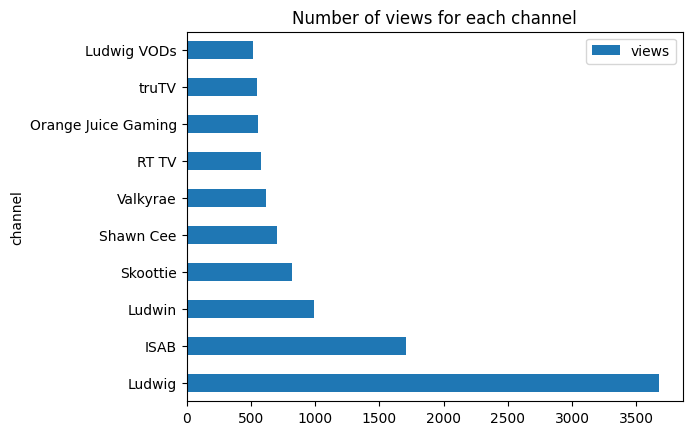

In [2]:
# Channel view
channel_occurance = pd.read_sql_query("SELECT channel, COUNT(title) AS 'views' FROM history GROUP BY channel ORDER BY views DESC LIMIT 10", conn)
channel_occurance.plot.barh(x='channel', title="Number of views for each channel", rot=0)
plt.show()


From the graph, Ludwig being my most watched channel is not suprising to me at all, there are even 2 of his other channels that area also there. ISAB, Skoottie, Valkyrae, and Orange Juice are other gaming creators that me and my sister enjoy. Shawn Cee and RT TV are reaction-type channels where I go to watch when I listen to an album for my first time and go and see how they react and their reviews of that album and I can compare my opinions with theirs.

In [3]:
# Collecting top 10 videos watched
top_10_videos = pd.read_sql_query("SELECT title, channel, COUNT(title) AS 'views' FROM history GROUP BY title ORDER BY views DESC LIMIT 10", conn)
print(top_10_videos)

                                               title       channel  views
0  J.I.D and Ski Mask The Slump God's Cypher - 20...           XXL     42
1           Kanye West - DONDA First REACTION/REVIEW     Shawn Cee     34
2  Baby Keem & Kendrick Lamar - FAMILY TIES REACT...     Shawn Cee     29
3            Drake & Baby Keem - What's Next (Remix)        BBK113     28
4  Baby Keem, Kendrick Lamar - family ties (Offic...  BabyKeemVEVO     23
5           J.I.D - DICAPRIO 2 First REACTION/REVIEW     Shawn Cee     20
6  Baby Keem - THE MELODIC BLUE First REACTION/RE...     Shawn Cee     20
7                     Trolling OfflineTV in Among Us        Ludwig     19
8                I bet $500 I wasn't the impostor...        Ludwig     19
9          Ludwig Reacts to His Custom Among Us Skin        Ludwig     17


The J.I.D and Ski Mask cypher video being on top makes sense to me since I know I like going back to that cypher since they dont have their verses on Spotify so I can only listen to it on Youtube. I also found out that I like to go back to Shawn Cee's reaction a lot since it's 4 of the top 10 videos. They are also my favorite albums and songs of the past few years. The last 3 being gaming videos is funny and that I would go back to those 3 specifically a lot.

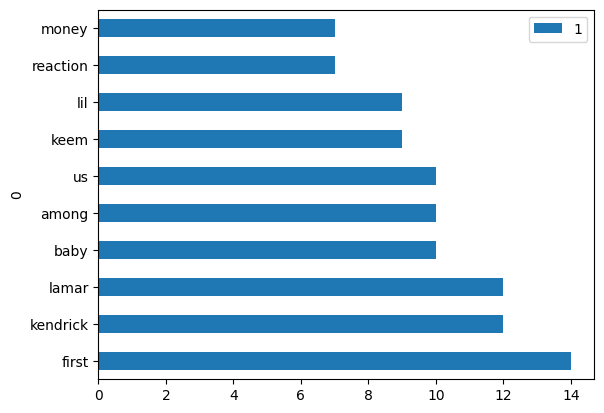

In [8]:
# Querying top 25 videos and concating all the titles into a single string
top_100_videos = pd.read_sql_query("SELECT title, channel, COUNT(title) AS 'views' FROM history GROUP BY title ORDER BY views DESC LIMIT 100", conn)
out = ' '.join(top_100_videos["title"])

# Using NLTK library to tokenize and gether the most common words
allWords = nltk.tokenize.word_tokenize(out)
allWords=[word.lower() for word in allWords if word.isalpha()]
stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w.lower() not in stopwords) 
mostCommon= allWordExceptStopDist.most_common(10)
word_list = pd.DataFrame(mostCommon)
word_list.plot.barh(x=0)
plt.show()

Searching through my top 100 most watched videos, these are the most common words that show up using the NLTK library. First being first refers to all the album reaction videos I watch for when other Youtubers listen to an album for the first time. Kendrick Lamar and Baby Keem being up there is also from their album and the reactions, and also I would play their song "Family Ties" on repeat, with it also being my most listened to song on Spotify. Among us shows up a lot as they are videos that me and my sister would watch a lot together. I'm sure that J.I.D, another rapper I listen to, would show up but I think that the line of code that removes all punctuations is keeping him from showing up which is something that I would like to look into later on.

In [5]:
# Converting date
day_occurance = pd.read_sql_query("SELECT day, COUNT(day) AS 'count' FROM history GROUP BY day ORDER BY count DESC", conn)
day_occurance

,day,count
0,Monday,7410
1,Thursday,6754
2,Tuesday,6752
3,Wednesday,6340
4,Friday,6270
5,Saturday,5927
6,Sunday,5320


Monday being the most is not that strange since it's the first day of the week and during my time in school, I would be watching videos when I get home or having videos on while working on projects. Sunday being last also makes sense to me, I would usually be at church which, for me, would take up a lot of the day. Weekends being at the bottom and weekdays at the top is reasonable.

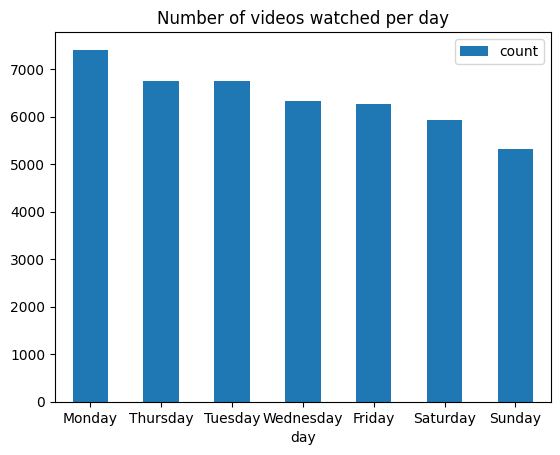

In [7]:
day_occurance.plot.bar(x='day', title="Number of videos watched per day", rot=0)
plt.show()

Looking at it as a bar graph shows that Monday and Sunday differ by quite a bit but every other day of the week are pretty similar to one another.

In [10]:
hour_occurance = pd.read_sql_query("SELECT hour, COUNT(day) AS 'count' FROM history GROUP BY hour ORDER BY hour ASC", conn)
hour_occurance

,hour,count
0,0,2441
1,1,2151
2,2,2013
3,3,1643
4,4,1082
5,5,757
6,6,278
7,7,463
8,8,711
9,9,1205


It's hard to really quantify this many rows so I'll use a graph.

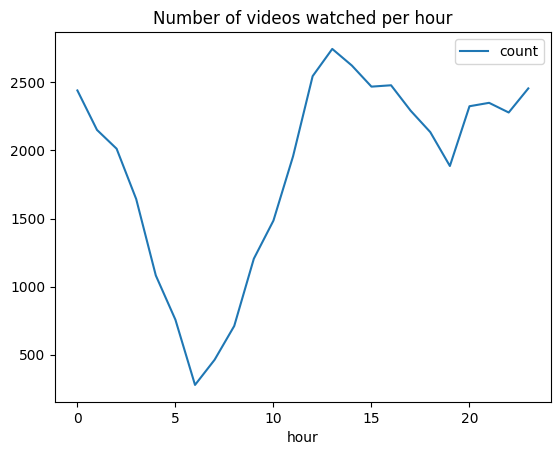

In [11]:
hour_occurance.plot(x='hour', title="Number of videos watched per hour", rot=0)
plt.show()

My peak hour of watching is around 12 PM, which is during lunch where I'd would almost always have a video playing on my phone if I'm eating alone. The sudden dip at around 8 PM is suprising to me. I would assume that it dips because before, I would be working closing plus that whole period of the graph going down is when I would usually go to the gym. I have a lot of views past midnight because I would usually sleep at around 2 AM and I like to sleep with a video playing as like a white noise but obviously it would go all the way down during peak sleep times.

In [4]:
# Close DB connection
conn.commit()
conn.close()